# Combine features with decision trees

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [4]:
# set up the grid with parameters to test

param_grid = {"max_depth": [2, 3, 4, None]}

In [5]:
# set up the tree within a grid search

tree_model = GridSearchCV(
    DecisionTreeRegressor(random_state=0),
    cv=5,
    scoring="neg_mean_squared_error",
    param_grid=param_grid,
)

In [6]:
# variables to combine

variables = ["AveRooms", "AveBedrms"]

In [7]:
# train the decision tree

tree_model.fit(X_train[variables], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, None]},
             scoring='neg_mean_squared_error')

In [8]:
# create the new feature

X_train["new_feat"] = tree_model.predict(X_train[variables])
X_test["new_feat"] = tree_model.predict(X_test[variables])

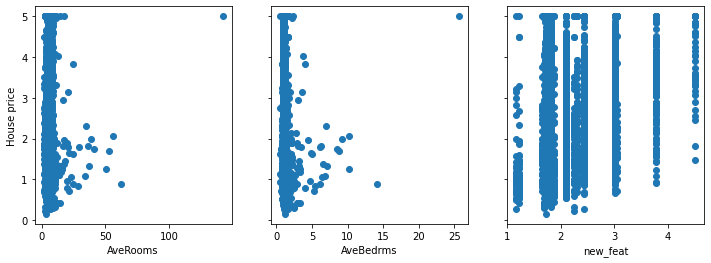

In [9]:
# plot the new feature

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

axs[0].scatter(X_test["AveRooms"], y_test)
axs[0].set_ylabel("House price")
axs[0].set_xlabel("AveRooms")

axs[1].scatter(X_test["AveBedrms"], y_test)
axs[1].set_xlabel("AveBedrms")

axs[2].scatter(X_test["new_feat"], y_test)
axs[2].set_xlabel("new_feat")

plt.show()

In [10]:
np.corrcoef(X_test["AveRooms"], y_test)[0, 1]

0.14079774617751806

In [11]:
np.corrcoef(X_test["AveBedrms"], y_test)[0, 1]

-0.033095559081300595

In [12]:
np.corrcoef(X_test["new_feat"], y_test)[0, 1]

0.46597491684689507

In [13]:
for var in variables + ["new_feat"]:
    corr = np.corrcoef(X_test[var], y_test)[0, 1]
    corr = np.round(corr, 3)
    print(f"Correlation between {var} and the target: {corr}")

Correlation between AveRooms and the target: 0.141
Correlation between AveBedrms and the target: -0.033
Correlation between new_feat and the target: 0.466
